### 8.4 Mạng nơ ron hồi tiếp
- Ta đã được giới thiệu mô hình n-gram, trong đó xác suất có điều kiện của từ x_t tại vị trí t chỉ phụ thuộc vào n - 1 từ trước đó. Nếu muốn kiếm tra ảnh hưởng có thể có của các từ ở trước vị trí t - (n - 1) đến từ x_t thì ta cần phải tăng n. Tuy nhiên, cùng với đó thì số lượng tham số của mô hình cũng sẽ tăng lên theo hàm mũ vì ta cần lưu [V]^n giá trị với một từ điển V nào đó. Do đó, thay vì mô hình hóa P(x_t | x_(t - 1), ..., x_(t - n + 1)), sẽ tốt hơn nếu ta sử dụng mô hình biến tiềm ẩn (latent variable model) trong đó:

    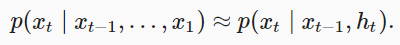




#### Mạng hồi tiếp không có trạng thái ẩn
- Xét một perceptron đa tầng với một tầng ẩn duy nhất, giả sử ta có một minibatch X với n mẫu và d đầu vào. Khi đó đầu ra của tầng ẩn là H với n mẫu và h thuộc tính như sau:

    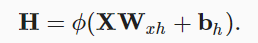

- Biến ẩn H được sử dụng làm đầu vào của tầng đầu ra, tầng đầu ra được tính toán bởi:

    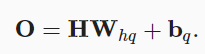

- Trong đó q là số lượng các đầu ra. Nếu đang giải quyết bài toán phân loại thì ta có thể sử dụng softmax(O) để tính phân phối xác suất của lớp đầu ra.

#### 2. Mạng hồi tiếp có trạng thái ẩn

- Vấn đề sẽ khác nếu ta sử dụng các trạng thái ẩn. Ta thường gọi vòng lặp thứ t là thời điểm t trong thuật toán tối ưu, nhưng trọng mạng nơ ron hồi tiếp, thời điểm t lại tương ứng với các bước trong một vòng lặp. Giả sử trong một vòng lặp ta có X_t chiều (n x d), t = 1..T và H_t chiều (n x h) là biến ẩn tại bước thời gian t của chuỗi. 
- Khác với perceptron đa tầng, ở đây ta lưu biến ẩn H_(t - 1) từ bước thời gian trước đó và dùng thêm một tham số trọng số mới W_hh chiều (h x h) để mô tả việc sử dụng biến ẩn của bước thời gian trước đó trong bước thời gian hiện tại.
- Cụ thể, biến ẩn của bước thời gian hiện tại được xác định vởi đầu vào của bước thời gian hiện tại cùng với biến ẩn của bước thời gian trước đó.

    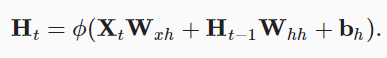

- So với mục 1, phương trình này có thêm 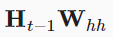. Từ mối quan hệ giữa các biến ẩn H_t và H_(t - 1) của các bước thời gian liền kề, ta biết rằng chúng ta đã __lưu lại thông tin lịch sử của chuỗi cho tới bước thời gian hiện tại__, giống như trạng thái hay bộ nhớ hiện thời của mạng nơ ron. 
- Vì trạng thái ẩn ở bước thời gian hiện tại và trước đó đều có cùng định nghĩa, phương trình trên được tính toán theo phương pháp hồi tiếp.

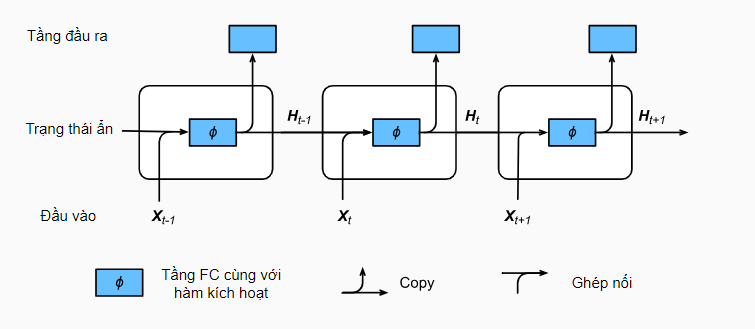

#### 3. Các bước trong mô hình ngôn ngữ

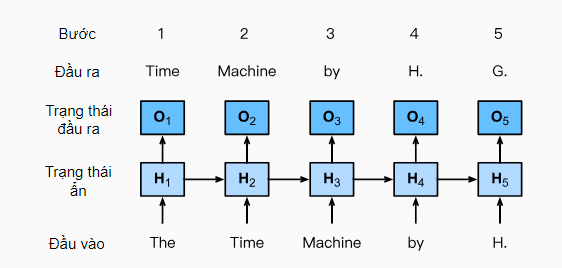

- Trong thực tế, mỗi từ được biểu diễn bởi một vector d chiều và kích thước batch thường là n > 1. Do đó, đầu vào X_t tại bước thời gian t sẽ là ma trận n x d, giống hệt với những gì chúng ta đã thảo luận ở trên.

#### 4. Perplexity
- Ta thảo luận về cách đo lường chất lượng của mô hình chuỗi, một cách để làm việc này là kiểm tra mức độ gây ngạc nhiên của văn bản. Một mô hình ngôn ngữ tốt có thể dự đoán chính xác các token tiếp theo. Xét các ví dụ sau:

    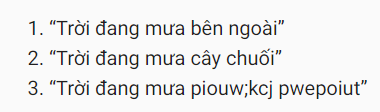

- Về chất lượng, ví dụ 1 là tốt nhất, các từ được sắp xếp hợp lý và mạch lạc về mặt logic. Mặc dù nó có thể không phản ánh chính xác hoàn toàn mặt ngữ nghĩa của các từ theo sau, mô hình vẫn có thể nắm bắt những từ nghe khá phù hợp.
- Ví dụ 2 tệ hơn đáng kể, mô hình này đã nối dài câu ra theo các vô nghĩa, tuy nhiên ít nhất mô hình đã viết đúng chính tả và học được phần nào sự tương quan giữa các từ.
- Ví dụ 3 là một mô hình được huấn luyện kém, không khớp được dữ liệu.

- Ta đo lượng một mô hình ngôn ngữ bằng thang đo perplexity (độ hỗn độn). Cụ thể như sau:

    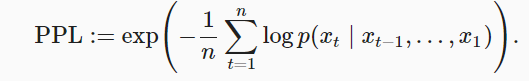

- Giá trị này có thể được hiểu rõ nhất như là trung bình điều hòa của số lựa chọn thực tế mà ta có khi quyết định chọn từ nào là từ tiếp theo. 
- Xét một số trường hợp sau:
    + Trong trường hợp tốt nhất, mô hình luôn ước tính xác suất của ký hiệu tiếp theo là 1, khi đó perplexity của mô hình là 1.
    + Trong trường hợp xấu nhất ,mô hình luôn dự đoán xác suất của nhãn là 0, khi đó perplexity là vô hạn.
    + Tại mức nền, mô hình dự đoán một phân phối đều lên tất cả các token. Trong trường hợp này perpexity bằng với len(vocab)